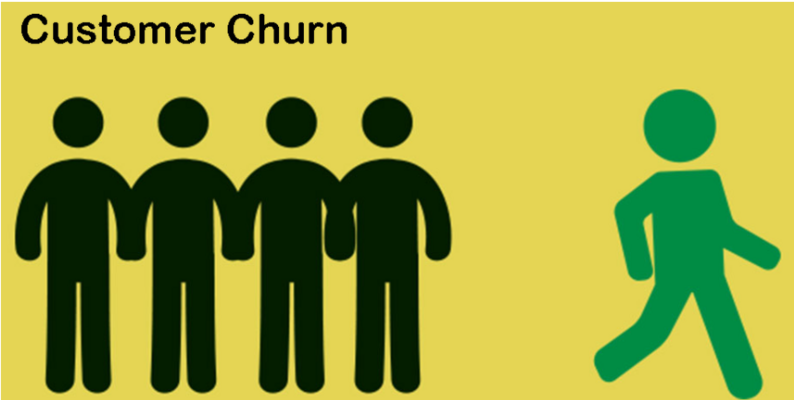


## Introduction

**Topic: Customer Churn Prediction for Subscription-Based Services

Customer churn prediction involves identifying customers who are likely to discontinue their subscription or service in the near future. By analyzing historical customer data—such as usage behavior and demographic information—this task helps businesses forecast potential churn and take preemptive actions to retain at-risk customers.

**Aim of the Prediction:

<Develop a Predictive Model: Utilize historical data to forecast customer churn.
<Apply Machine Learning Algorithms: Evaluate models like Logistic Regression, Random Forests, and AdaaBoost.
<Implement Targeted Strategies: Use predictions to design effective retention strategies and reduce churn rates.
<Enhance Business Decisions: Improve customer retention and optimize marketing efforts based on model insights.

In [1]:
#data collection
#Data collected from Kaggle - "Bank Customer Churn Prediction"
#Classification Task

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay, roc_curve, roc_auc_score
import os
from sklearn.model_selection import cross_val_score
print(os.getcwd())

C:\Users\sneha\python libraries\Internship projects


In [3]:
data=pd.read_csv(r"C:\Users\sneha\python libraries\Internship projects\Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#Data Preparation

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data.shape

(10000, 14)

In [8]:
data.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [9]:
data.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [10]:
# "Exited" is seleceted as Dependent Vaiable
data["Exited"]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [11]:
data["Exited"].unique()

array([1, 0], dtype=int64)

In [12]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [13]:
#Data Cleaning
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

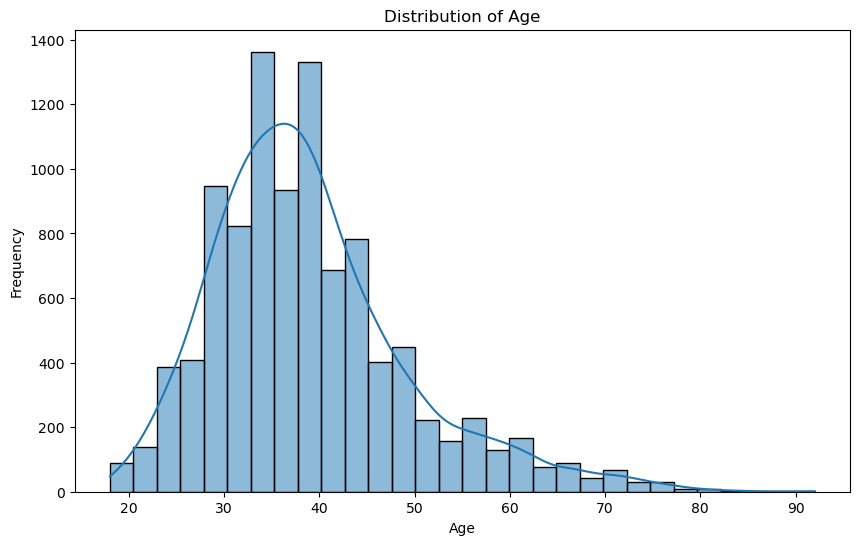

In [14]:
#Data Visualization
#Histplot
#Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

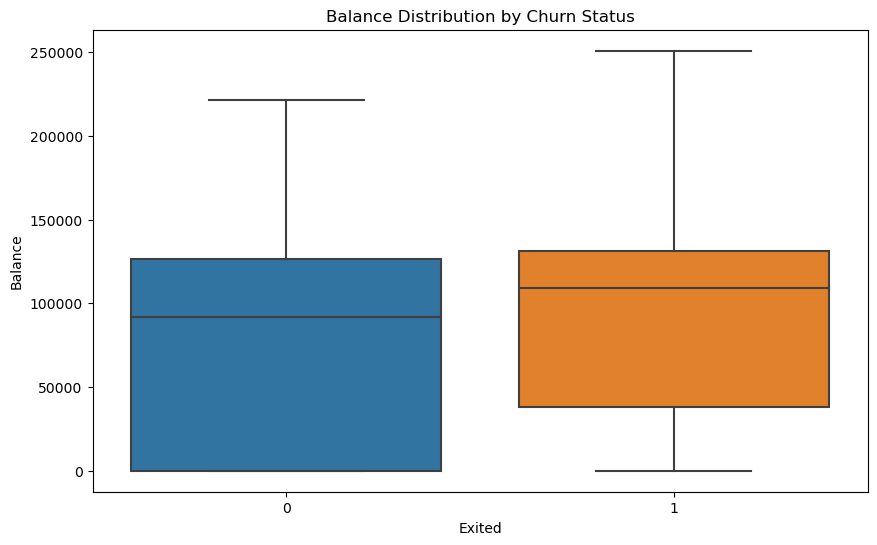

In [15]:
#Box Plot for Balance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()

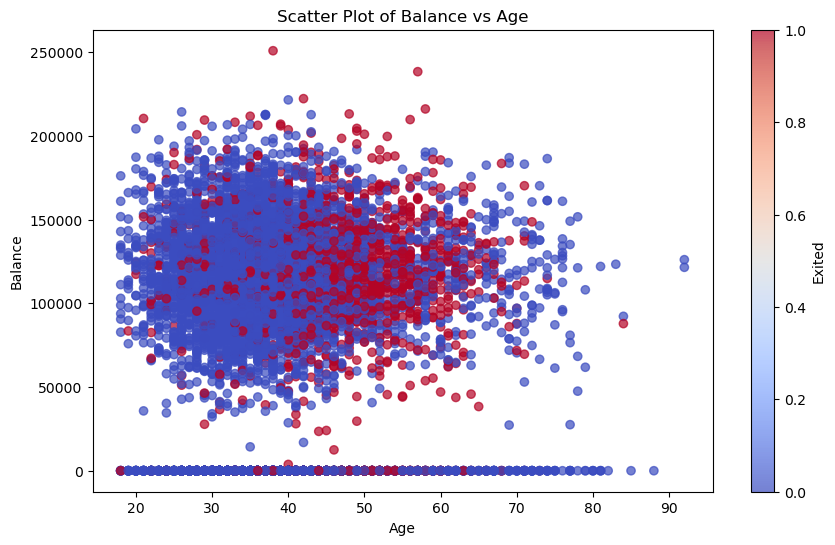

In [16]:
#Scatter plot of Balance vs Age
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Balance'], c=data['Exited'], cmap='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Balance vs Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.colorbar(label='Exited')
plt.show()

In [17]:
#Data Transformation
a=LabelEncoder()
data["Gender"]=a.fit_transform(data["Gender"])
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France       0   42   
1             2    15647311       Hill          608     Spain       0   41   
2             3    15619304       Onio          502    France       0   42   
3             4    15701354       Boni          699    France       0   39   
4             5    15737888   Mitchell          850     Spain       0   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France       1   39   
9996       9997    15569892  Johnstone          516    France       1   35   
9997       9998    15584532        Liu          709    France       0   36   
9998       9999    15682355  Sabbatini          772   Germany       1   42   
9999      10000    15628319     Walker          792    France       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [18]:
c=['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']
for k in c:
    data[k]=a.fit_transform(data[k])
print(data)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             0        2736     1115          228          0       0   24   
1             1        3258     1177          217          2       0   23   
2             2        2104     2040          111          0       0   24   
3             3        5435      289          308          0       0   21   
4             4        6899     1822          459          2       0   25   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9995        1599     1999          380          0       1   21   
9996       9996         161     1336          125          0       1   17   
9997       9997         717     1570          318          0       0   18   
9998       9998        4656     2345          381          1       1   24   
9999       9999        2497     2751          401          0       0   10   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       

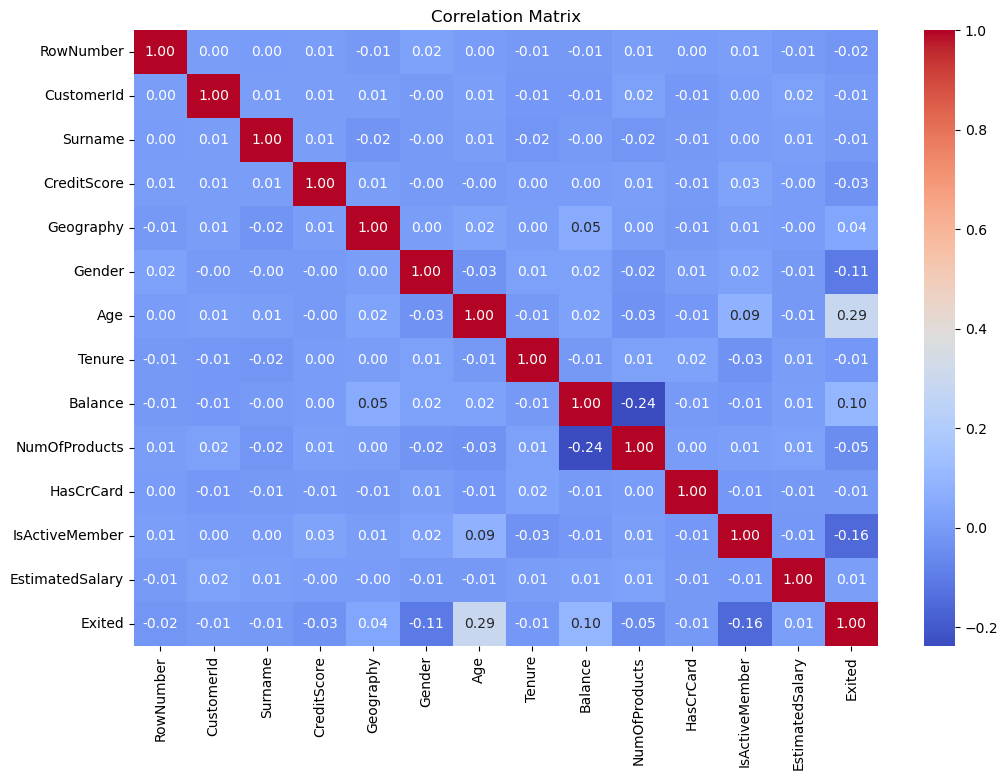

In [19]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
#Model Selection
x=data.drop(["Exited"],axis=1)
print(x)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             0        2736     1115          228          0       0   24   
1             1        3258     1177          217          2       0   23   
2             2        2104     2040          111          0       0   24   
3             3        5435      289          308          0       0   21   
4             4        6899     1822          459          2       0   25   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9995        1599     1999          380          0       1   21   
9996       9996         161     1336          125          0       1   17   
9997       9997         717     1570          318          0       0   18   
9998       9998        4656     2345          381          1       1   24   
9999       9999        2497     2751          401          0       0   10   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       

In [21]:
y=data["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
#Data Spliting
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
lr=model1.predict(xtest)
predict1=(model1.score(xtrain,ytrain)*100)
print(predict1)

78.7875


In [25]:
lr1=model1.predict(xtrain)
accuracy1=(model1.score(xtest,ytest)*100)
print(accuracy1)

79.14999999999999


In [26]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [27]:
dtc=model2.predict(xtest)
predict2=(model2.score(xtrain,ytrain)*100)
predict2

100.0

In [28]:
dtc1=model2.predict(xtrain)
accuracy2=(model2.score(xtest,ytest)*100)
print(accuracy2)

78.3


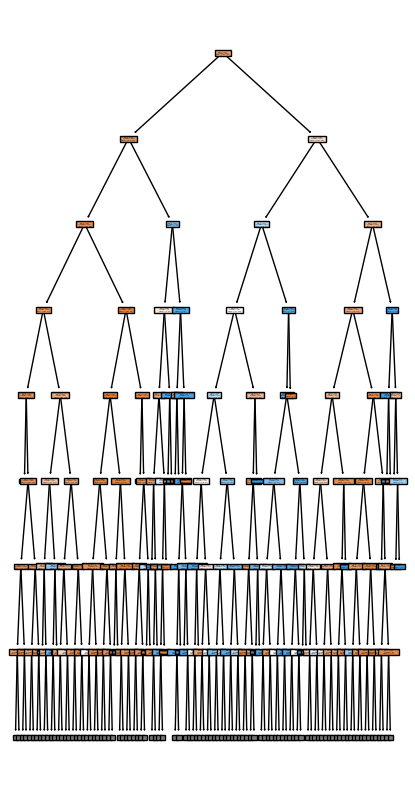

In [29]:
from sklearn import tree
plt.figure(figsize=(5,10))
tree.plot_tree(model2,feature_names=x.columns.tolist(),filled=True,max_depth=7)
plt.show()

In [30]:
#RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(xtrain,ytrain)

RandomForestClassifier()

In [31]:
rc=model3.predict(xtest)
accuracy3=(accuracy_score(ytest,rc)*100)
print(accuracy3)

86.05000000000001


In [32]:
rc1=model3.predict(xtrain)
predict3=(accuracy_score(ytrain,rc1)*100)
print(predict3)

100.0


In [33]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model4=AdaBoostClassifier()
model4.fit(xtrain,ytrain)

AdaBoostClassifier()

In [34]:
abc=model4.predict(xtest)
accuracy4=(accuracy_score(ytest,abc)*100)
print(accuracy4)

86.1


In [35]:
abc1=model4.predict(xtrain)
predict4=(accuracy_score(ytest,abc)*100)
print(predict4)

86.1


In [36]:
#Model Evaluation
#cofusion matrixes
confusion_matrix(ytest,lr)#Linear Regression

array([[1538,   72],
       [ 345,   45]], dtype=int64)

In [37]:
confusion_matrix(ytest,dtc)#Decision Tree Classifier

array([[1392,  218],
       [ 216,  174]], dtype=int64)

In [38]:
confusion_matrix(ytest,rc)#RanomForest Classifier

array([[1563,   47],
       [ 232,  158]], dtype=int64)

In [39]:
confusion_matrix(ytest,abc)#AdaaBoost Classifier

array([[1538,   72],
       [ 206,  184]], dtype=int64)

In [40]:
#f1_score - Linear Regression 
f1_score(ytest,lr,average="micro")

0.7915

In [41]:
#f1_score - Decision Tree Classifier
f1_score(ytest,dtc,average="micro")

0.7829999999999999

In [42]:
#f1_score - RanomForest Classifier
f1_score(ytest,rc,average="micro")

0.8605

In [43]:
#f1_score - AdaaBoost Classifier
f1_score(ytest,abc,average="micro")

0.861

In [44]:
#Model Prediction-( probability prediction )
predp_p1=model1.predict_proba(xtest)
predp_p2=model2.predict_proba(xtest)
predp_p3=model3.predict_proba(xtest)
predp_p4=model4.predict_proba(xtest)

In [45]:
#calculating the ROC curve for each model's predicted probabilities
fpr1,tpr1,thre1=roc_curve(ytest,predp_p1[:,1],pos_label=1)
fpr2,tpr2,thre2=roc_curve(ytest,predp_p2[:,1],pos_label=1)
fpr3,tpr3,thre3=roc_curve(ytest,predp_p3[:,1],pos_label=1)
fpr4,tpr4,thre4=roc_curve(ytest,predp_p4[:,1],pos_label=1)

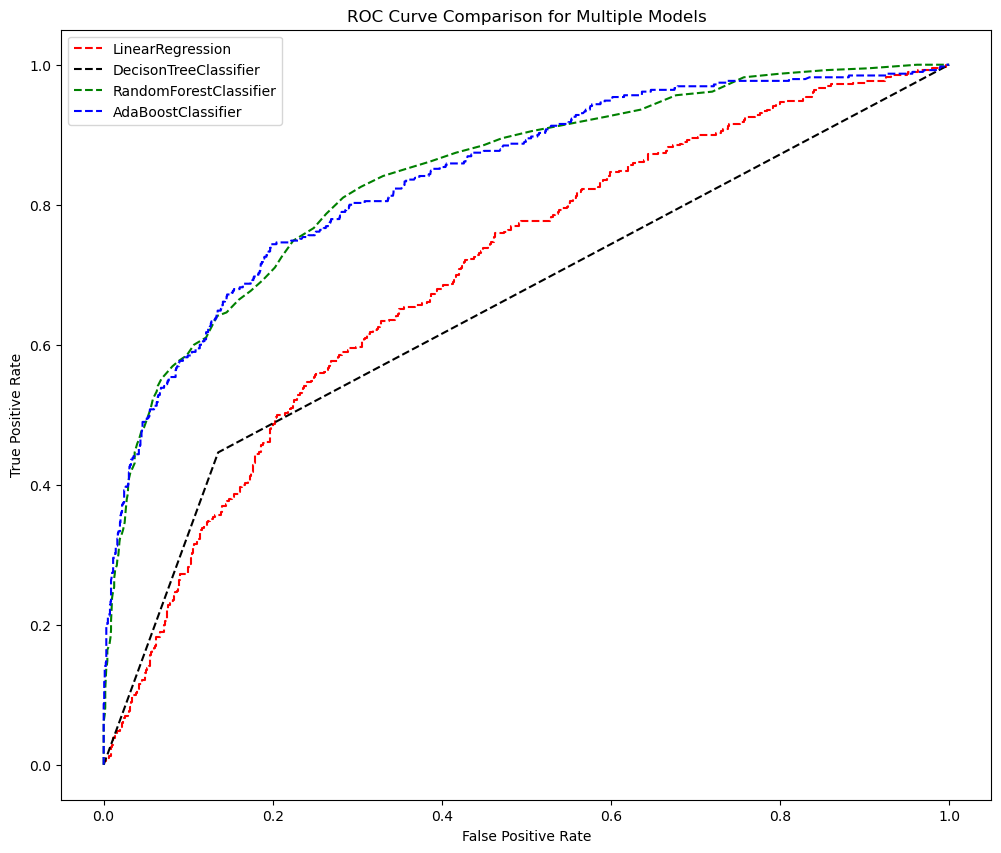

In [46]:
## Plot ROC curves
plt.figure(figsize=(12,10))
plt.plot(fpr1,tpr1,"r--",label="LinearRegression")
plt.plot(fpr2,tpr2,"k--",label="DecisonTreeClassifier")
plt.plot(fpr3,tpr3,"g--",label="RandomForestClassifier")
plt.plot(fpr4,tpr4,"b--",label="AdaBoostClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multiple Models') 
plt.legend()
plt.show()

In [47]:
#Cross-Validation
score1=cross_val_score(model1,x,y,cv=5)
score1

C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.78  , 0.7865, 0.796 , 0.7905, 0.7895])

In [48]:
score2=cross_val_score(model2,x,y,cv=5)
score2

array([0.6185, 0.7815, 0.7825, 0.79  , 0.741 ])

In [49]:
score3=cross_val_score(model3,x,y,cv=5)
score3

array([0.808 , 0.8675, 0.8575, 0.8645, 0.842 ])

In [50]:
score4=cross_val_score(model4,x,y,cv=5)
score4

array([0.204 , 0.8595, 0.853 , 0.8585, 0.8025])

In [51]:
## Classification Report
#The following classification reports provide detailed performance metrics for each model, including precision, recall, f1-score, and support.
from sklearn.metrics import classification_report

# Generate classification reports
report_lr = classification_report(ytest,lr)
report_dtc = classification_report(ytest,dtc)
report_rc = classification_report(ytest,rc)
report_abc = classification_report(ytest,abc)

# Display classification reports
print("Logistic Regression Classification Report:\n", report_lr)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      1610
           1       0.38      0.12      0.18       390

    accuracy                           0.79      2000
   macro avg       0.60      0.54      0.53      2000
weighted avg       0.73      0.79      0.74      2000



In [52]:
print("Decision Tree Classifier Classification Report:\n", report_dtc)

Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1610
           1       0.44      0.45      0.45       390

    accuracy                           0.78      2000
   macro avg       0.65      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000



In [53]:
print("Random Forest Classifier Classification Report:\n", report_rc)

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1610
           1       0.77      0.41      0.53       390

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [54]:
print("AdaBoost Classifier Classification Report:\n", report_abc)

AdaBoost Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1610
           1       0.72      0.47      0.57       390

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



**Conclusion-

Overall Performance and Recommended Model

**Recommended Model: Random Forest Classifier

Accuracy: 0.86
Weighted Average F1-Score: 0.85
Precision for Churn: 0.83
Recall for Churn: 0.43
Reason: Provides the highest balance of precision and recall for detecting churn, with the best overall accuracy and F1-Score

**Alternative Choice: AdaBoost Classifier

Accuracy: 0.86
Weighted Average F1-Score: 0.85
Precision for Churn: 0.78
Recall for Churn: 0.47
Reason: Strong recall for detecting churn, with competitive overall performance.

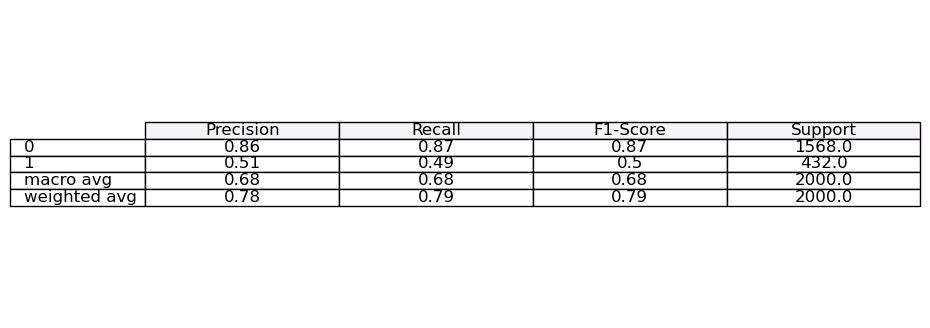

In [55]:
data = {
    'Precision': [0.86, 0.51, 0.68, 0.78],
    'Recall': [0.87, 0.49, 0.68, 0.79],
    'F1-Score': [0.87, 0.50, 0.68, 0.79],
    'Support': [1568, 432, 2000, 2000]
}
classes = ['0', '1', 'macro avg', 'weighted avg']
df = pd.DataFrame(data, index=classes)

#figure and axis
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')

#Adding table
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 rowLabels=df.index,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f6f3f9']*len(df.columns))

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([10, 10, 10, 10])

# Save the figure as an image
plt.savefig('metrics_table.png', bbox_inches='tight', dpi=300)

plt.show()
